# Task 6.4 Regression Analysis 

### 
1. Import Libraries & Data
2. Data Cleaning
3. Data prep for regression analysis 
4. Regression analysis

### 1. Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\RebekkaBrandt\Documents\Immo Data Analysis'

# import file
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_avgfam.csv'), index_col = False)

### 2. Data Cleaning

####
Cleaning has been done in previous workbooks

### 3. Data prep for regression analysis 

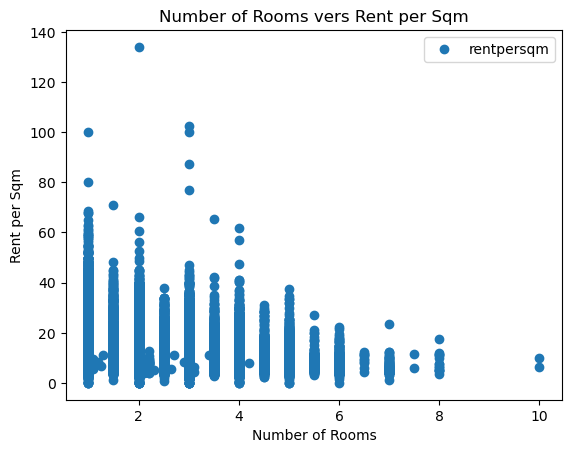

In [4]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'noRooms', y='rentpersqm',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Rooms vers Rent per Sqm')  
plt.xlabel('Number of Rooms')  
plt.ylabel('Rent per Sqm')  
plt.show()

##### Hypothesis: The rent per Sqm is higher for properties with fewer rooms, than for properties with high number of rooms

In [5]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['noRooms'].values.reshape(-1,1)
y = df['rentpersqm'].values.reshape(-1,1)

In [6]:
X

array([[4.],
       [3.],
       [3.],
       ...,
       [4.],
       [2.],
       [3.]])

In [7]:
y

array([[ 6.91860465],
       [11.51551313],
       [ 5.89853826],
       ...,
       [ 6.84210526],
       [12.        ],
       [12.14285714]])

In [8]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [9]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [10]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

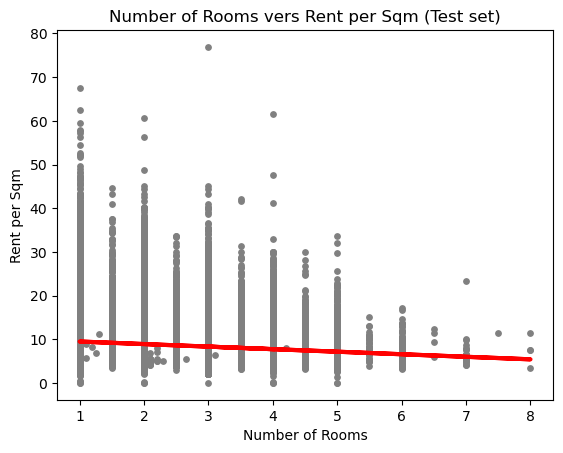

In [12]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Rooms vers Rent per Sqm (Test set)')
plot_test.xlabel('Number of Rooms')
plot_test.ylabel('Rent per Sqm')
plot_test.show()

#
The regression line does not over most of the data points. Many data points, especially in the lower end of rooms are much higher

In [15]:
# Save figure

plot_test.savefig(os.path.join(path, '04 Visualization','regression.png'), bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [13]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [14]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.58181558]]
Mean squared error:  20.085685148496875
R2 score:  0.013617215385624881


#
The slope shows us a negative relationship, confirming that rent per sqm drops with higher number of rooms. Altough at a degree of 0,58 the fall is relatively low
The MSE is at 20 seems relatively low which technically would imply a good fit, but we need to take the variation of the data points into account, which puts this into perspective
A R2 score of 0.01 is quite low indicating the model is not performing very well.

In [18]:
y_predicted

array([[7.75206751],
       [8.91569867],
       [8.91569867],
       ...,
       [8.33388309],
       [8.91569867],
       [8.33388309]])

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.252101,7.752068
1,11.908856,8.915699
2,6.103596,8.915699
3,5.222222,8.042975
4,14.572917,7.752068
5,10.000000,7.752068
6,6.449945,8.333883
7,13.963964,7.752068
8,5.723977,9.497514
9,7.114773,8.333883


#####
We can see quite a difference between the actual and the predicted y values .
Taking this as well as the models model summary statistics into account the model is not a good fit explaining the realationship between number of rooms and rent per sqm
